In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

# Load data
# base_path = "/home/tvanhout/oxides_ML/models/hyperparameter_optimization/augment"
# directory = "Set3/architecture_pool_heads/input_architecture_pool_heads_3"

base_path = "/home/tvanhout/oxides_ML/models/test_training"
directory = "test_surface_order"

df_training     = pd.read_csv(os.path.join(base_path, directory , "training.csv"))
df_train_set    = pd.read_csv(os.path.join(base_path, directory , "train_set.csv")) 
df_test_set     = pd.read_csv(os.path.join(base_path, directory , "test_set.csv"))
df_val_set      = pd.read_csv(os.path.join(base_path, directory , "validation_set.csv"))
df_uq           = pd.read_csv(os.path.join(base_path, directory , "uq.csv"))

df_test_set[["Abs_error_eV"]].mean()

Abs_error_eV    0.398106
dtype: float64

## Performance metrics

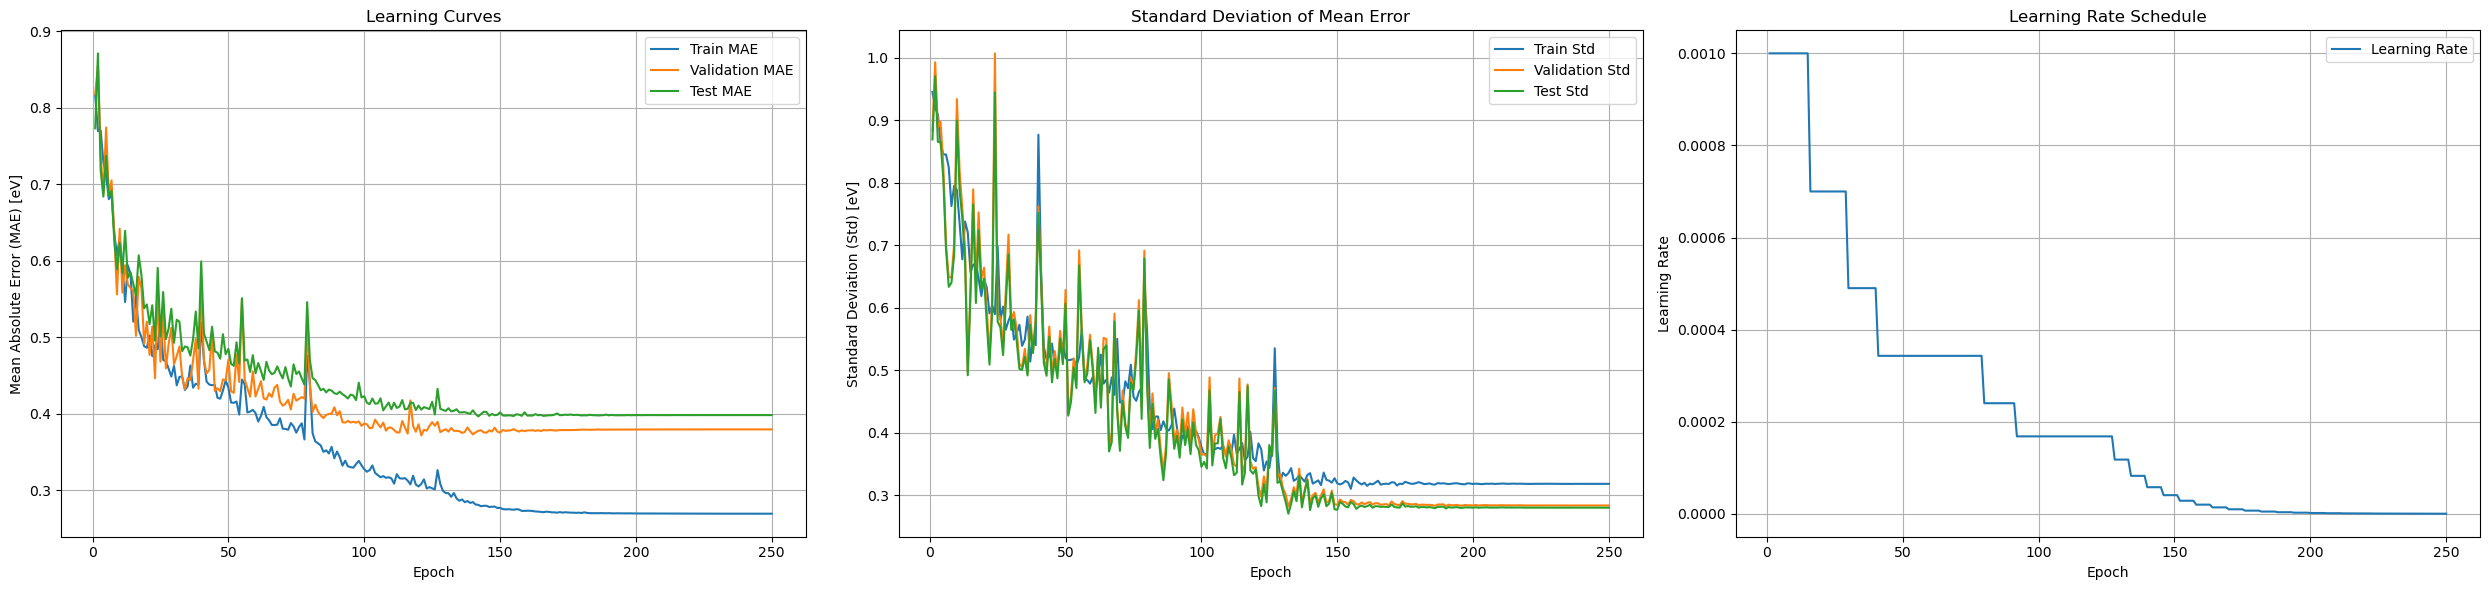

In [86]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Learning Curves (Train, Val, Test MAE)
axs[0].plot(df_training['Epoch'], df_training['Train_MAE_eV'], label='Train MAE')
axs[0].plot(df_training['Epoch'], df_training['Val_MAE_eV'], label='Validation MAE')
axs[0].plot(df_training['Epoch'], df_training['Test_MAE_eV'], label='Test MAE')

axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Mean Absolute Error (MAE) [eV]')
axs[0].set_title('Learning Curves')
axs[0].legend()
axs[0].grid(True)

# Standard Deviation of Predictions (Train, Val, Test Std)
axs[1].plot(df_training['Epoch'], df_training['Train_std_eV'], label='Train Std')
axs[1].plot(df_training['Epoch'], df_training['Val_std_eV'], label='Validation Std')
axs[1].plot(df_training['Epoch'], df_training['Test_std_eV'], label='Test Std')

axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Standard Deviation (Std) [eV]')
axs[1].set_title('Standard Deviation of Mean Error')
axs[1].legend()
axs[1].grid(True)

# Learning Rate Schedule
axs[2].plot(df_training['Epoch'], df_training['Learning_Rate'], label='Learning Rate')

axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Learning Rate')
axs[2].set_title('Learning Rate Schedule')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


##  Evaluation of the test set

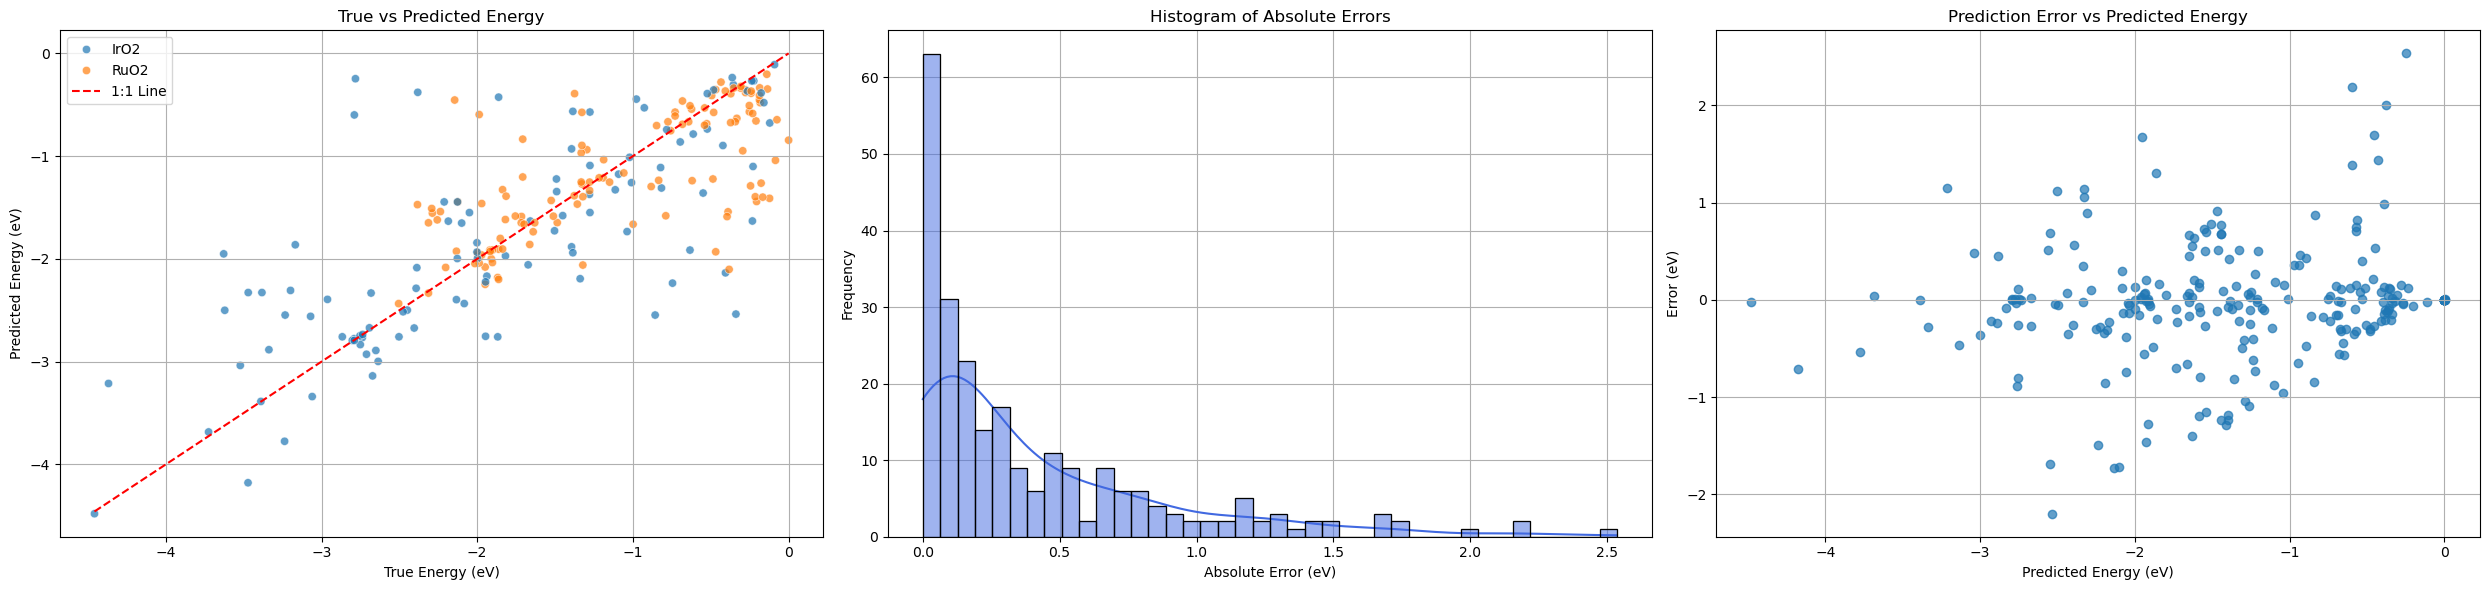

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))  

# True vs. Predicted Energy Plot
sns.scatterplot(df_test_set, x='True_eV', y='Prediction_eV', alpha=0.7, hue= "Material", ax=axes[0])
axes[0].plot([min(df_test_set['True_eV']), max(df_test_set['True_eV'])], 
             [min(df_test_set['True_eV']), max(df_test_set['True_eV'])], 
             'r--', label='1:1 Line')
axes[0].set_xlabel('True Energy (eV)')
axes[0].set_ylabel('Predicted Energy (eV)')
axes[0].set_title('True vs Predicted Energy')
axes[0].legend()
axes[0].grid(True)

# Histogram of Absolute Errors
sns.histplot(df_test_set['Abs_error_eV'], bins=40, kde=True, color='royalblue', ax=axes[1], zorder = 10)
axes[1].set_xlabel('Absolute Error (eV)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Absolute Errors')
axes[1].grid(True)

# Prediction Error vs. Predicted Energy
axes[2].scatter(df_test_set['Prediction_eV'], df_test_set['Error_eV'], alpha=0.7)
axes[2].set_xlabel('Predicted Energy (eV)')
axes[2].set_ylabel('Error (eV)')
axes[2].set_title('Prediction Error vs Predicted Energy')
axes[2].grid(True)

plt.tight_layout()
plt.show()


## Uncertainty quantification

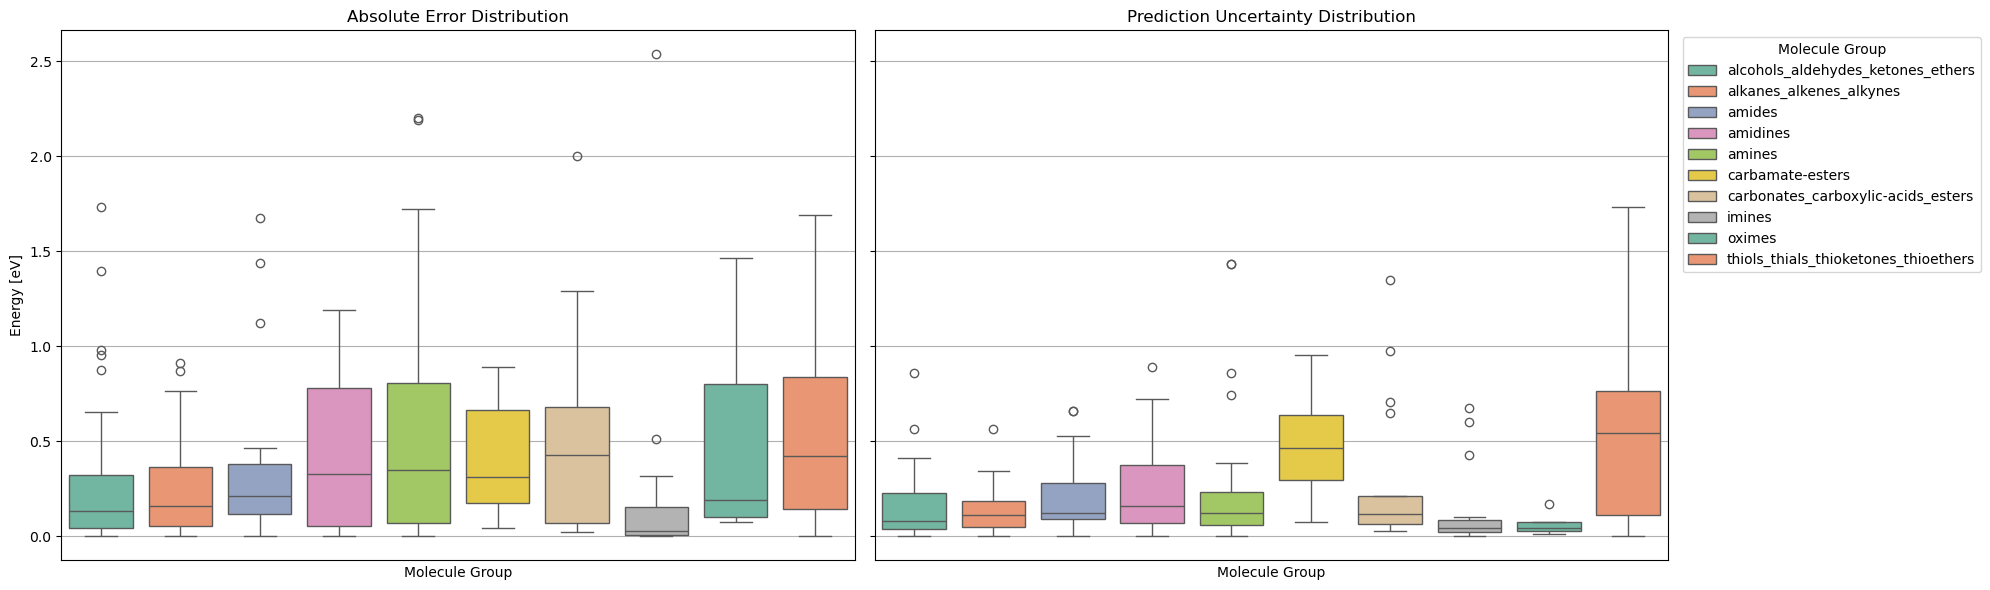

In [88]:
df_uq_sorted = df_uq.sort_values('molecule_group')

df_uq_sorted['abs_error'] = df_uq_sorted['error'].abs()
df_uq_sorted['uncertainty_width'] = df_uq_sorted['y_std']

# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# First subplot: Absolute Error
sns.boxplot(data=df_uq_sorted, x='molecule_group', y='abs_error', hue='molecule_group', palette="Set2", legend=False, ax=axes[0])
axes[0].set_xlabel('Molecule Group')
axes[0].set_ylabel('Energy [eV]')
axes[0].set_title('Absolute Error Distribution')
axes[0].set_xticks([])
axes[0].grid(True)

# Second subplot: Uncertainty Width
sns.boxplot(data=df_uq_sorted, x='molecule_group', y='uncertainty_width', hue='molecule_group', palette="Set2", legend=True, ax=axes[1])
axes[1].set_xlabel('Molecule Group')
axes[1].set_ylabel('')  # Shared y-label already on left
axes[1].set_title('Prediction Uncertainty Distribution')
axes[1].set_xticks([])
axes[1].grid(True)
axes[1].legend(title='Molecule Group', bbox_to_anchor=(1.01, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


## Uncertainty Qualification per Surface

In [89]:
df_uq.groupby('material')['y_std'].mean()

material
IrO2    0.294728
RuO2    0.299072
Name: y_std, dtype: float64

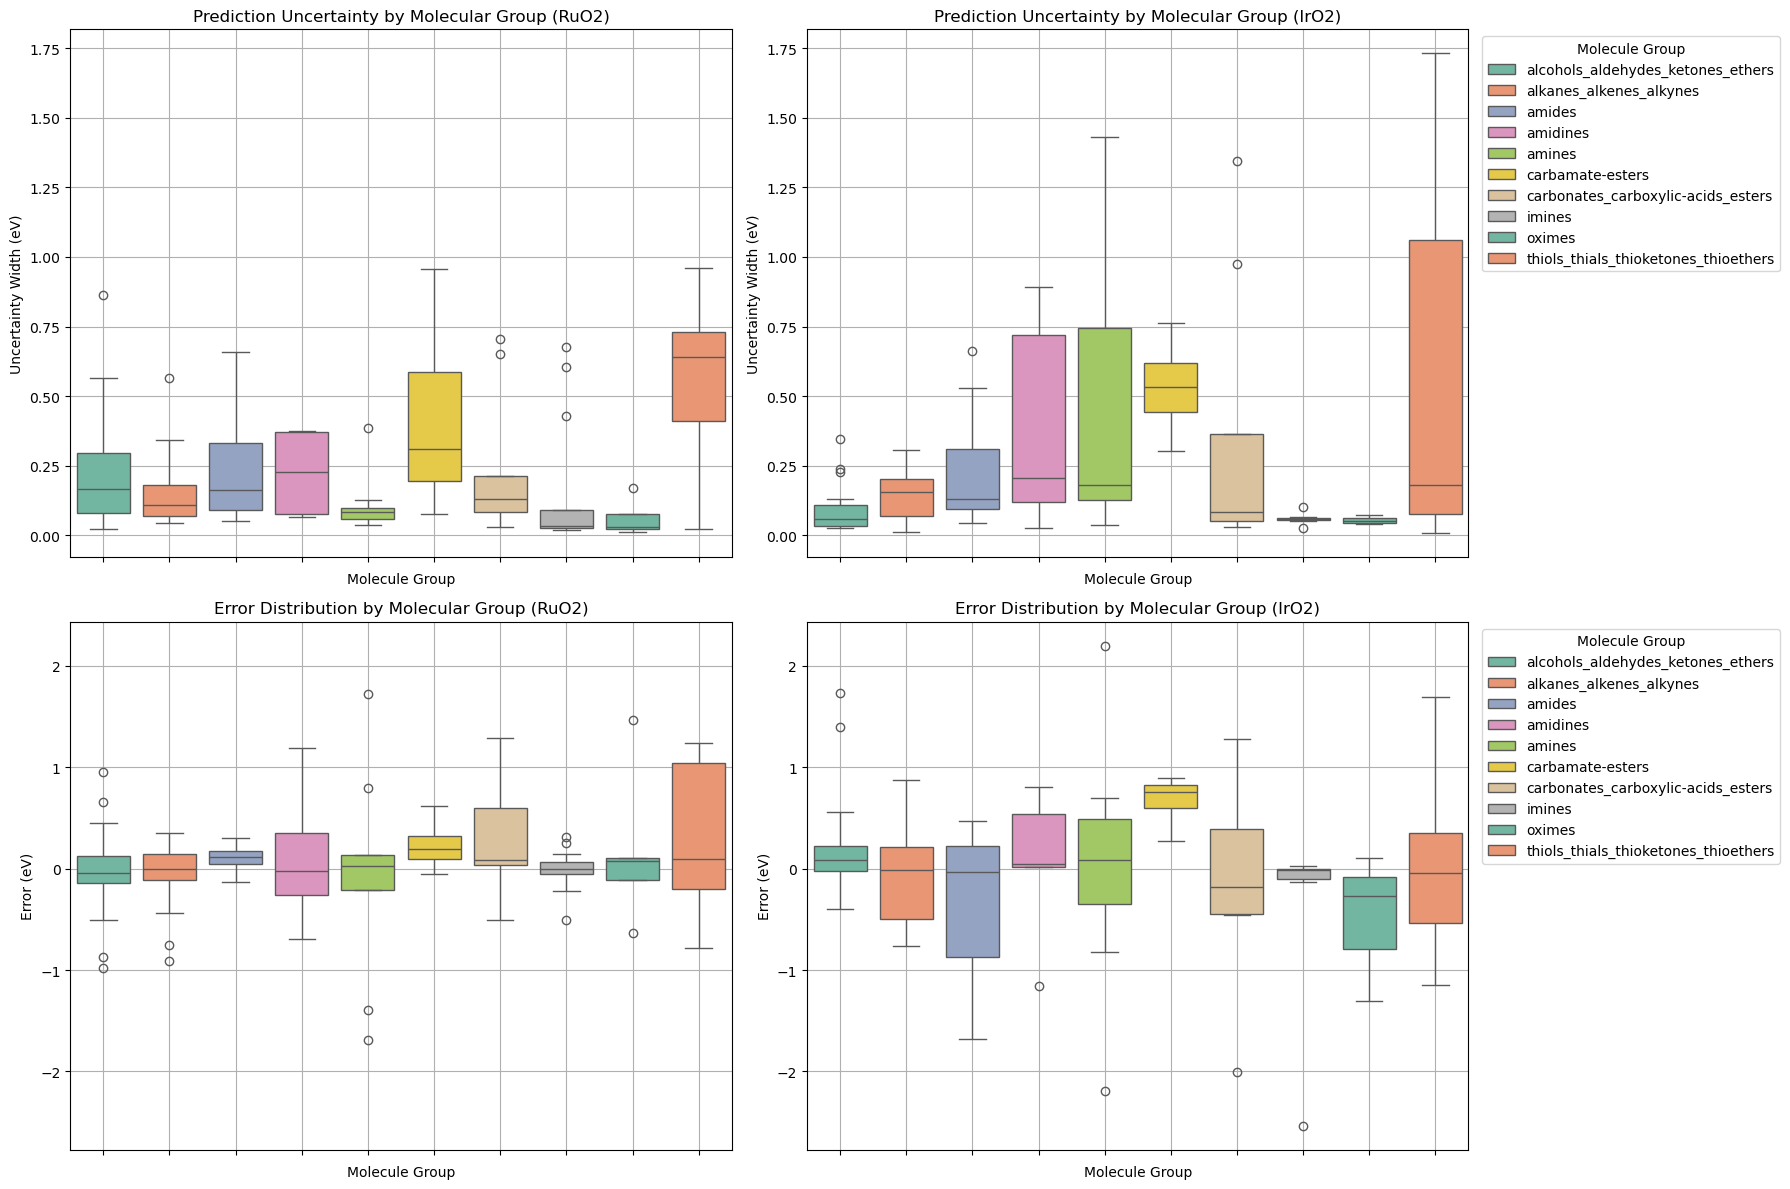

In [90]:
# Filter per material
df_ru = df_uq_sorted[df_uq_sorted['material'] == 'RuO2']
df_ir = df_uq_sorted[df_uq_sorted['material'] == 'IrO2']


# Create figure with two subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 1 row, 2 columns

# RuO2 plot
sns.boxplot(data=df_ru, x='molecule_group', y='uncertainty_width', hue='molecule_group', palette='Set2', legend=False, ax=axes[0,0]
)
axes[0,0].set_title("Prediction Uncertainty by Molecular Group (RuO2)")
axes[0,0].set_xlabel("Molecule Group")
axes[0,0].set_ylabel("Uncertainty Width (eV)")
axes[0,0].set_xticklabels([])
axes[0,0].grid(True)
axes[0,0].sharey(axes[0,1])


# IrO2 plot
sns.boxplot(data=df_ir, x='molecule_group', y='uncertainty_width', hue='molecule_group', palette='Set2', legend=True, ax=axes[0,1])
axes[0,1].set_title("Prediction Uncertainty by Molecular Group (IrO2)")
axes[0,1].set_xlabel("Molecule Group")
axes[0,1].set_ylabel("Uncertainty Width (eV)")
axes[0,1].set_xticklabels([])
axes[0,1].grid(True)
axes[0,1].legend(title='Molecule Group', bbox_to_anchor=(1.01, 1), loc='upper left')

# RuO2 plot
sns.boxplot(data=df_ru, x='molecule_group', y='error', hue='molecule_group', palette='Set2', legend=False, ax=axes[1,0]
)
axes[1,0].set_title("Error Distribution by Molecular Group (RuO2)")
axes[1,0].set_xlabel("Molecule Group")
axes[1,0].set_ylabel("Error (eV)")
axes[1,0].set_xticklabels([])
axes[1,0].grid(True)
axes[1,0].sharey(axes[1,1])


# IrO2 plot
sns.boxplot(data=df_ir, x='molecule_group', y='error', hue='molecule_group', palette='Set2', legend=True, ax=axes[1,1])
axes[1,1].set_title("Error Distribution by Molecular Group (IrO2)")
axes[1,1].set_xlabel("Molecule Group")
axes[1,1].set_ylabel("Error (eV)")
axes[1,1].set_xticklabels([])
axes[1,1].grid(True)
axes[1,1].legend(title='Molecule Group', bbox_to_anchor=(1.01, 1), loc='upper left')



plt.tight_layout()
plt.show()


In [91]:
df_uq.sort_values(["y_true"], ascending=True).head(15)

,formula,material,surface,molecule_group,molecule,y_true,y_mean,error,y_std,y_min,y_max,in_interval,norm_res
175,C2H6Ir40N2O80,IrO2,110.0,amidines,Acetimidamide,-4.457949,-4.479746,0.021798,0.026390,-4.531471,-4.428021,True,0.825976
211,CH4Ir40N2O80,IrO2,110.0,amidines,Formimidamide,-4.367753,-3.212345,-1.155408,0.720751,-4.625018,-1.799672,True,-1.603060
60,C2H5Ir40NO81,IrO2,110.0,amides,Acetamide,-3.725091,-3.684339,-0.040752,0.044090,-3.770756,-3.597922,True,-0.924277
207,CH3Ir40NO81,IrO2,110.0,amides,Formamide,-3.628156,-1.951018,-1.677137,0.094881,-2.136984,-1.765052,False,-17.676275
236,CH3Ir40NO81,IrO2,110.0,amides,Formamide,-3.621316,-2.500244,-1.121072,0.527471,-3.534087,-1.466401,False,-2.125371
89,C2H6Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Ethanethiol,-3.521612,-3.036951,-0.484661,0.121328,-3.274754,-2.799148,False,-3.994632
127,CH3Ir40NO82,IrO2,110.0,carbamate-esters,Carbamic-acid,-3.471884,-4.178577,0.706694,0.492469,-5.143816,-3.213338,True,1.435001
204,C3H8Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thiol,-3.470652,-2.327659,-1.142993,1.731601,-5.721598,1.066279,True,-0.660079
183,C2H6Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Ethanethiol,-3.389266,-3.387082,-0.002184,0.056419,-3.497663,-3.276500,True,-0.038713
212,C3H8Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thiol,-3.382555,-2.327659,-1.054896,1.731601,-5.721598,1.066279,True,-0.609202


In [92]:
df_uq.sort_values(["y_std"], ascending=False).head(20)

,formula,material,surface,molecule_group,molecule,y_true,y_mean,error,y_std,y_min,y_max,in_interval,norm_res
125,O80Ru40,RuO2,110.0,NaN,NaN,0.000000,-0.845112,0.845112,5.729740,-12.075402,10.385179,True,0.147496
204,C3H8Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thiol,-3.470652,-2.327659,-1.142993,1.731601,-5.721598,1.066279,True,-0.660079
212,C3H8Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thiol,-3.382555,-2.327659,-1.054896,1.731601,-5.721598,1.066279,True,-0.609202
193,C2H6Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Ethanethiol,-3.199007,-2.306983,-0.892024,1.643309,-5.527869,0.913902,True,-0.542822
26,C3H9Ir40NO80,IrO2,110.0,amines,Trimethylamine,-1.037496,-1.734394,0.696898,1.431313,-4.539767,1.070979,True,0.486894
172,C3H9Ir40NO80,IrO2,110.0,amines,Propan-2-amine,-2.185714,-1.632822,-0.552892,1.431308,-4.438185,1.172541,True,-0.386285
121,C3H6Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thione,-2.961699,-2.394149,-0.567550,1.357387,-5.054628,0.266330,True,-0.418119
23,CH2Ir40O83,IrO2,110.0,carbonates_carboxylic-acids_esters,Carbonic-acid,-2.650964,-2.891158,0.240194,1.346147,-5.529605,-0.252710,True,0.178431
152,C2H4Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Ethanethial,-0.421980,-0.896870,0.474890,1.113958,-3.080228,1.286487,True,0.426309
231,C3H6Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thione,-0.745690,-2.236046,1.490356,1.010808,-4.217229,-0.254862,True,1.474421


In [93]:
df_uq.sort_values(["error"], ascending=False).head(15)

,formula,material,surface,molecule_group,molecule,y_true,y_mean,error,y_std,y_min,y_max,in_interval,norm_res
130,C2H7Ir40NO80,IrO2,110.0,amines,Ethanamine,-0.338456,-2.537213,2.198757,0.745865,-3.999108,-1.075319,False,2.947931
78,C3H6Ir40O81,IrO2,110.0,alcohols_aldehydes_ketones_ethers,Propan-2-one,-0.405574,-2.135713,1.730139,0.237533,-2.601278,-1.670147,False,7.283773
90,C3H9NO80Ru40,RuO2,110.0,amines,Propan-2-amine,-0.382101,-2.102285,1.720184,0.098059,-2.294481,-1.910089,False,17.542273
166,CH2Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Methanethial,-0.857223,-2.546620,1.689397,0.064049,-2.672157,-2.421083,False,26.376520
231,C3H6Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thione,-0.745690,-2.236046,1.490356,1.010808,-4.217229,-0.254862,True,1.474421
191,CH3NO81Ru40,RuO2,110.0,oximes,Formaldoxime,-0.468205,-1.930997,1.462792,0.169272,-2.262770,-1.599224,False,8.641678
83,C2H6Ir40O81,IrO2,110.0,alcohols_aldehydes_ketones_ethers,Methoxymethane,-0.232686,-1.631329,1.398643,0.074245,-1.776850,-1.485808,False,18.838099
8,C2H4O82Ru40,RuO2,110.0,carbonates_carboxylic-acids_esters,Acetic-acid,-0.122469,-1.410778,1.288309,0.164841,-1.733866,-1.087690,False,7.815463
173,C2H4Ir40O82,IrO2,110.0,carbonates_carboxylic-acids_esters,Acetic-acid,-0.633570,-1.914346,1.280776,0.069135,-2.049850,-1.778841,False,18.525720
157,C3H6O80Ru40S,RuO2,110.0,thiols_thials_thioketones_thioethers,Propane-2-thione,-0.205680,-1.441509,1.235829,0.869906,-3.146525,0.263508,True,1.420646


In [94]:
outliers = df_uq[df_uq["formula"] == "CH4Ir40O80S"]
outliers

,formula,material,surface,molecule_group,molecule,y_true,y_mean,error,y_std,y_min,y_max,in_interval,norm_res
162,CH4Ir40O80S,IrO2,110.0,thiols_thials_thioketones_thioethers,Methanethiol,-3.070039,-2.559191,-0.510848,0.061964,-2.68064,-2.437742,False,-8.24429
